In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [3]:
df_train: pd.DataFrame = pd.read_csv("../data/train.csv")
df_nocoord: pd.DataFrame = pd.read_csv("../data/no_coord_train.csv")

In [67]:
arr = [1368314,  183950,  498709,   30871,  737684,  825096,
       1162019,  811174,  454547,  356296, 1003876,  849531, 1199139,  182829,  385819,  147121,
        224510,  578581, 1492417, 1093727.]
rows = df_train.iloc[arr]

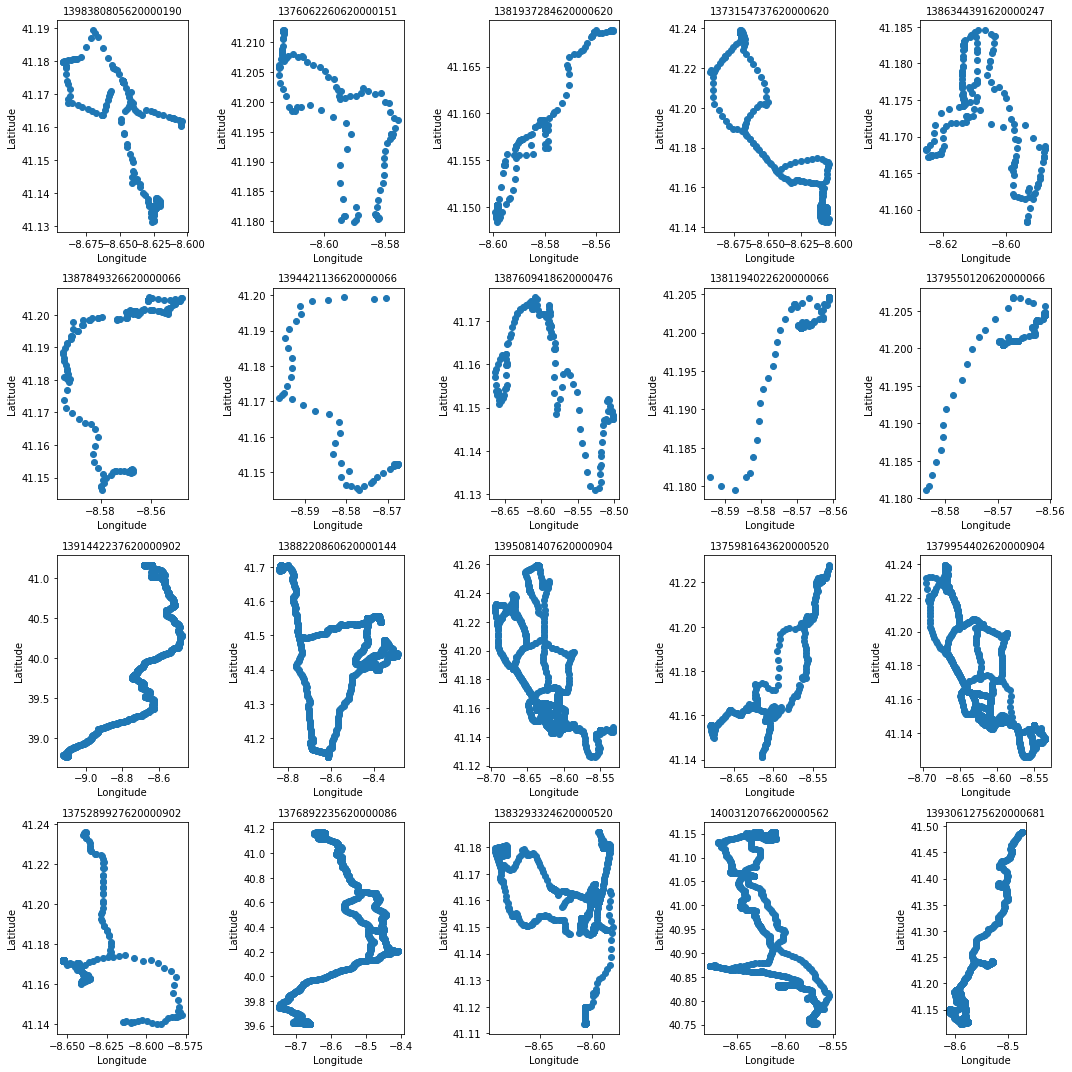

In [71]:
fig, axs = plt.subplots(4, 5)
fig.set_size_inches(15, 15)
for i, (idx, row) in enumerate(rows.iterrows()):
    ax = plt.subplot(4, 5, i + 1)
    # ax.set_aspect('equal')
    ax.set_title(row["TRIP_ID"], fontsize = 10)
    ax.set_xlabel("Longitude", fontsize = 10)
    ax.set_ylabel("Latitude", fontsize = 10)
    coords = np.array(ast.literal_eval(row["POLYLINE"]))
    ax.scatter(coords[:, 0], coords[:, 1])

fig.tight_layout()
plt.gca().set_aspect('equal')
plt.autoscale()
plt.show()

In [8]:
coords = []

In [9]:
for i, (idx, row) in enumerate(df_train.iterrows()):
    coords += ast.literal_eval(row["POLYLINE"])

In [10]:
coords = np.array(coords)

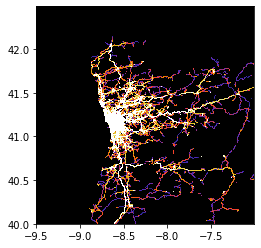

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig: plt.Figure = plt.figure()
ax1: plt.Axes = fig.add_subplot(1, 1, 1, aspect="equal")
bucket_interval = 0.01
ax1.hist2d(coords[:, 0], coords[:, 1], bins=[np.arange(-9.5, -7, bucket_interval),np.arange(40, 42.5, bucket_interval)], norm=LogNorm(vmax=200, clip=True), cmap="CMRmap")
plt.show()